AVATAR CREATOR

In [376]:
import cv2
import numpy as np
import pandas
import matplotlib.pyplot as plt


In [377]:
def read_image(filename):
    img=cv2.imread(filename)
    img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
    return img

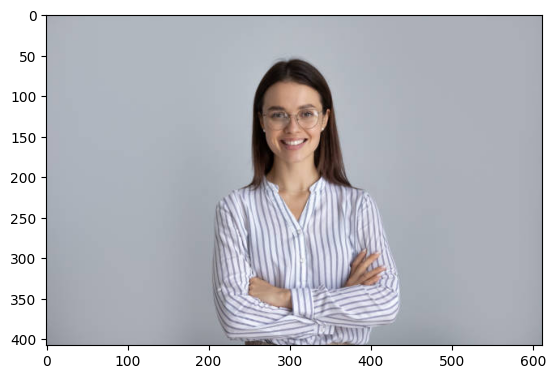

In [378]:
filename="images1.jpg"
img=read_image(filename)
org_image=np.copy(img)

Create Edge

In [379]:
def edge_mark(img, line_size, blur_value):
    gray= cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    grayBlur= cv2.medianBlur(gray, blur_value)
    edges=cv2.adaptiveThreshold(grayBlur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_value)
    return edges



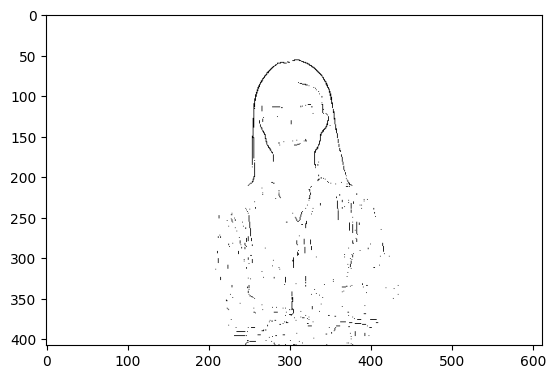

In [380]:
line_size = 3
blur_value =7
edges=edge_mark(img, line_size, blur_value)
plt.imshow(edges, cmap="gray")
plt.show()

Reduce  NO of Color

In [381]:
def color_quantization(img, k):
    data=np.float32(img).reshape((-1,3))
    criteria=(cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER , 20, 0.001)
    ret, label, centre = cv2.kmeans(data, k, None, criteria,10,cv2.KMEANS_RANDOM_CENTERS)
    centre=np.uint8(centre)

    result=centre [label.flatten()]
    result=result.reshape(img.shape)
    return result

<function matplotlib.pyplot.show(close=None, block=None)>

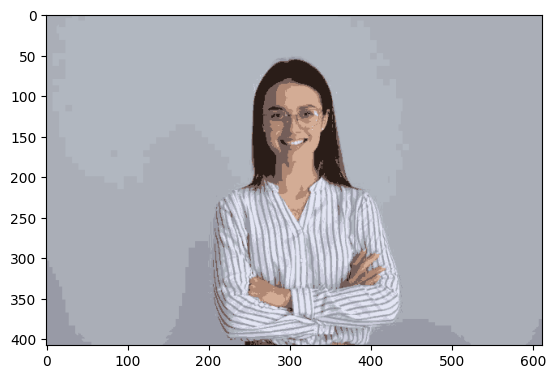

In [382]:
img=color_quantization(img, k=9)
plt.imshow(img)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

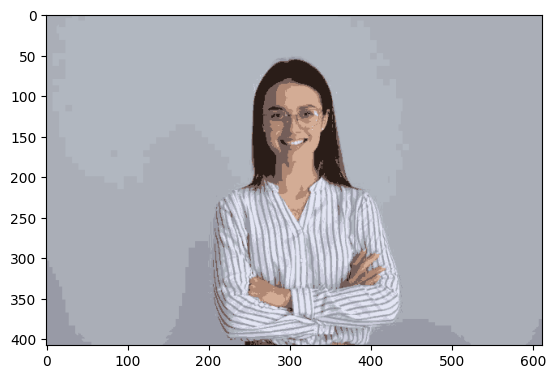

In [383]:
blurred=cv2.bilateralFilter(img,d=3,sigmaColor=7,sigmaSpace=200)
plt.imshow(blurred)
plt.show

Merge above images

In [384]:
def avatar():
    c= cv2.bitwise_and(blurred,blurred,mask=edges)
    
    plt.imshow(c)
    plt.show

    
 
    

Avatar

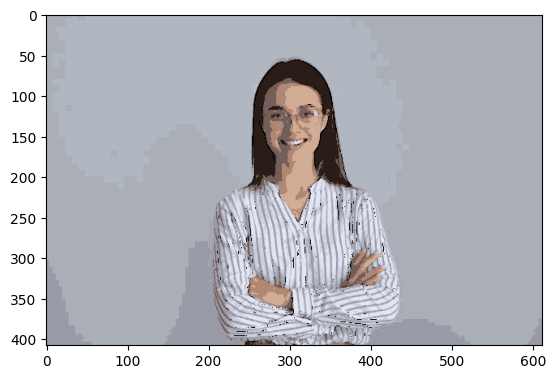

In [385]:
avatar()


Real Image

<function matplotlib.pyplot.show(close=None, block=None)>

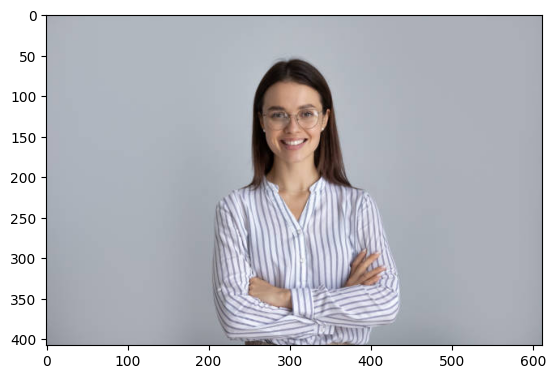

In [386]:
    plt.imshow(org_image)
    plt.show